In [7]:
import glob
from PIL import Image
from utils import image_analysis

path = "./ROC"
species = ["Staphylococcus aureus", "Coagulase-negative Staphylococcus"]
#species = ["Coagulase-negative Staphylococcus"]

probs = dict.fromkeys(species)
for key in probs.keys():
    probs[key] = []

# Evaluate overall probability of each snapshot
for sp in species:
    files = glob.glob(path + "/" + sp + "/*.JPG")
    for filename in files:
        img = Image.open(filename)
        # Image classification
        crop_width, crop_height = 512, 512
        class_indices, result = image_analysis.image_classifier(img, crop_width, crop_height, verbose=False)

        # Calculate overall probability
#        overall_prob = image_analysis.calc_overall_probability(class_indices, result, max_method=True, max_key="Staphylococcus aureus")
        overall_prob = image_analysis.calc_overall_probability(class_indices, result)
        probs[sp].append(overall_prob)
        print("Evaluated {}".format(filename))


########################### Summary #############################
Staphylococcus aureus                              96.9281%
Coagulase-negative Staphylococcus                   3.0719%
Background                                          0.0000%
Evaluated ./ROC/Staphylococcus aureus/IMG_2818.JPG
########################### Summary #############################
Staphylococcus aureus                              98.6598%
Coagulase-negative Staphylococcus                   1.3402%
Background                                          0.0000%
Evaluated ./ROC/Staphylococcus aureus/IMG_2824.JPG
########################### Summary #############################
Staphylococcus aureus                              91.5834%
Coagulase-negative Staphylococcus                   8.4120%
Background                                          0.0046%
Evaluated ./ROC/Staphylococcus aureus/IMG_2819.JPG
########################### Summary #############################
Staphylococcus aureus                      

In [3]:
# ROC analysis
from sklearn import metrics
import matplotlib.pyplot as plt
target = "Staphylococcus aureus"
y_true = []
y_pred = []
for sp in probs.keys():
    for prob in probs[sp]:
        y_true.append(1 if sp == target else 0)
        y_pred.append(prob[target]/100.0)

print(y_true)
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.3153056074592326, 0.3077184395513292, 0.32414461715928733, 0.6660951473750174, 0.5908717654645443, 0.29284627199303165, 0.33796649334353157, 0.32653297797917324, 0.3284431253811674, 0.6984102305243997, 0.5765593211130741, 0.69374203166808, 0.7100401808818181, 0.23887722042862514, 0.5162114787639843, 0.6713153346467555, 0.26805385307605173, 0.31563403281260044, 0.7080085712174575, 0.7004971440349307, 0.1191763093709786, 0.6888209601243337, 0.6699924122529208, 0.52391572146573, 0.32915124864894574, 0.2760346847898013, 0.4048519986594329, 0.49887052103877066, 0.20325284733006213, 0.26739982616386065, 0.2931703129513716, 0.05547116675068832, 0.3512517192143605, 0.1642908796622969, 0.26521560583911874, 0.1517269081098968, 0.05410851392925538, 0.17764312144792085, 0.336989081234021, 0.3988961317721229, 0.1696713178050686, 0.0964

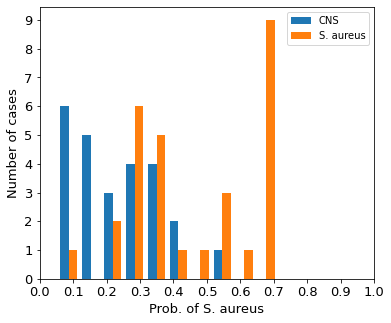

In [4]:
# Plot distribution
import pandas as pd
import numpy as np
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
x0 = df[df['y_true']==0]['y_pred']
x1 = df[df['y_true']==1]['y_pred']

fig = plt.figure(figsize=(6,5)) #
ax = fig.add_subplot(1, 1, 1)
ret = ax.hist([x0, x1], bins=10, stacked=False, label=["CNS", "S. aureus"])
hist_max = int(np.max(ret[0]))

plt.xticks(np.arange(0, 1.1, 0.1), fontsize = 13)
plt.yticks(np.arange(0, hist_max+1, 1), fontsize = 13)

plt.xlabel('Prob. of S. aureus', fontsize = 13)
plt.ylabel('Number of cases', fontsize = 13)
plt.legend()

#plt.ylim(0, 10)
plt.show()

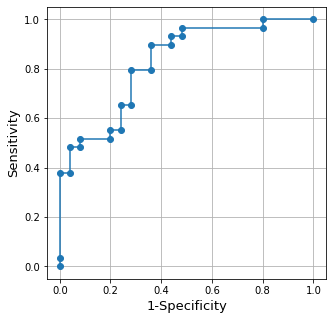

In [5]:
# ROC curve
fpr, tpr, thres = metrics.roc_curve(y_true, y_pred)

plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('1-Specificity', fontsize = 13)
plt.ylabel('Sensitivity', fontsize = 13)
plt.grid()
plt.show()

In [6]:
auc = metrics.auc(fpr, tpr)
print('AUC:', auc)

# Youden index
sgn = 1 - fpr
tpr_sgn_1 = tpr + sgn - 1
idx = np.argmax(tpr_sgn_1)
Th = thres[idx]
Se = tpr[idx]
Sp = sgn[idx]
print("Sensitivity {:.2f}%, Specificity {:.2f}%, Threshold {:.2f}%".format(Se*100, Sp*100, Th*100))

AUC: 0.8262068965517242
Sensitivity 89.66%, Specificity 64.00%, Threshold 26.81%
